In [1]:
from data.sp_data import SPData
from models import SPCplex
from evaluation.evaluation import SPEvaluation
from plotting.sp_plot import SPPlot

import networkx as nx
# import matplotlib
# matplotlib.use('Qt5Agg')  # Or 'Qt5Agg', depending on your system
# import matplotlib.pyplot as plt

import neal



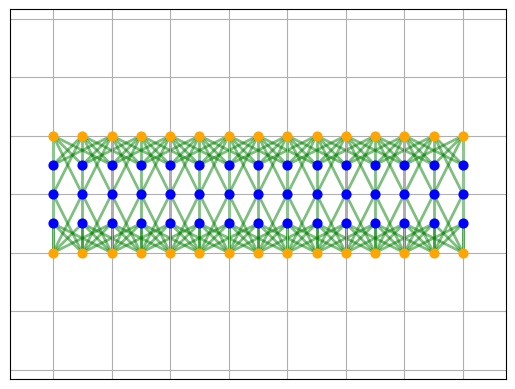

In [2]:

# params = {"lidar_density": 0.1, "street_point_density": 0.1}
# data = SPData().create_problem_from_glb_file(**params)

params = {"version": 3, "num_cols": 15, "rad_max": 2.4}
data = SPData().gen_problem(**params) 

plt = SPPlot(data).plot_problem()
plt.show()


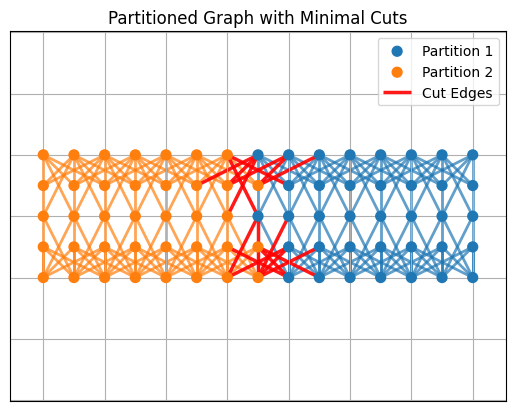

In [3]:
# Assess interactions with a desired number of partitions
partitions, cut_size, intra_edges, inter_edges, complexity_info = data.assess_interactions(num_partitions=2)

# Convert cut edges to a list (from generator in edge_boundary)
cut_edges = list(nx.edge_boundary(data.G, *partitions))

# Plot partitions
plotter = SPPlot(data)
plt = plotter.plot_partitioned_graph(partitions, cut_edges)
plt.show()

In [4]:
pat_datas = data.partition_data(num_partitions=2)

In [5]:
merge_data = SPData().merge_data(pat_datas)

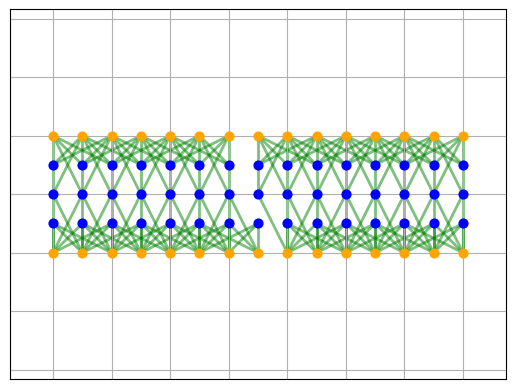

In [6]:
plt = SPPlot(merge_data).plot_problem()
plt.show()

answer.solution = {'x_3.0_0.0_2.5_0_-10': 0, 'x_4.0_4.0_2.5_0_-10': 1.0, 'x_7.0_0.0_2.5_0_-10': 0, 'x_5.0_4.0_2.5_0_-10': 0, 'x_6.0_4.0_2.5_0_-10': 0, 'x_0.0_4.0_2.5_0_-10': 0, 'x_2.0_4.0_2.5_0_-10': 1.0, 'x_6.0_0.0_2.5_0_-10': 0, 'x_5.0_0.0_2.5_0_-10': 1.0, 'x_2.0_0.0_2.5_0_-10': 0, 'x_3.0_4.0_2.5_0_-10': 0, 'x_0.0_0.0_2.5_0_-10': 0, 'x_1.0_0.0_2.5_0_-10': 1.0, 'x_4.0_0.0_2.5_0_-10': 0, 'x_1.0_4.0_2.5_0_-10': 0}
len(answer.solution) = 15
solution clean: {'x_3.0_0.0_2.5_0_-10': 0, 'x_4.0_4.0_2.5_0_-10': 1.0, 'x_7.0_0.0_2.5_0_-10': 0, 'x_5.0_4.0_2.5_0_-10': 0, 'x_6.0_4.0_2.5_0_-10': 0, 'x_0.0_4.0_2.5_0_-10': 0, 'x_2.0_4.0_2.5_0_-10': 1.0, 'x_6.0_0.0_2.5_0_-10': 0, 'x_5.0_0.0_2.5_0_-10': 1.0, 'x_2.0_0.0_2.5_0_-10': 0, 'x_3.0_4.0_2.5_0_-10': 0, 'x_0.0_0.0_2.5_0_-10': 0, 'x_1.0_0.0_2.5_0_-10': 1.0, 'x_4.0_0.0_2.5_0_-10': 0, 'x_1.0_4.0_2.5_0_-10': 0}
objective = 4


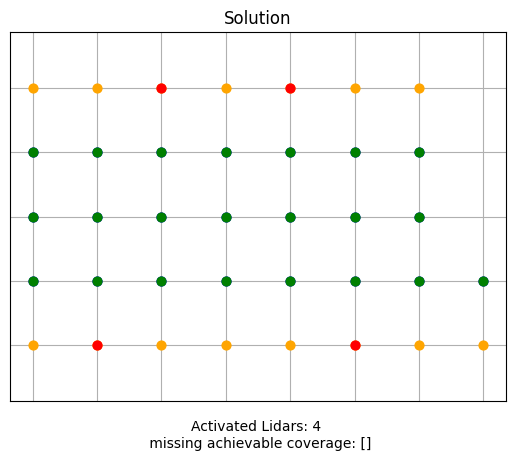

answer.solution = {'x_10.0_0.0_2.5_0_-10': 0, 'x_13.0_4.0_2.5_0_-10': 0, 'x_14.0_0.0_2.5_0_-10': 0, 'x_8.0_4.0_2.5_0_-10': 0, 'x_12.0_4.0_2.5_0_-10': 1.0, 'x_13.0_0.0_2.5_0_-10': 1.0, 'x_9.0_0.0_2.5_0_-10': 0, 'x_8.0_0.0_2.5_0_-10': 1.0, 'x_9.0_4.0_2.5_0_-10': 1.0, 'x_11.0_4.0_2.5_0_-10': 1.0, 'x_7.0_4.0_2.5_0_-10': 0, 'x_12.0_0.0_2.5_0_-10': 0, 'x_14.0_4.0_2.5_0_-10': 0, 'x_10.0_4.0_2.5_0_-10': 0, 'x_11.0_0.0_2.5_0_-10': 0}
len(answer.solution) = 15
solution clean: {'x_10.0_0.0_2.5_0_-10': 0, 'x_13.0_4.0_2.5_0_-10': 0, 'x_14.0_0.0_2.5_0_-10': 0, 'x_8.0_4.0_2.5_0_-10': 0, 'x_12.0_4.0_2.5_0_-10': 1.0, 'x_13.0_0.0_2.5_0_-10': 1.0, 'x_9.0_0.0_2.5_0_-10': 0, 'x_8.0_0.0_2.5_0_-10': 1.0, 'x_9.0_4.0_2.5_0_-10': 1.0, 'x_11.0_4.0_2.5_0_-10': 1.0, 'x_7.0_4.0_2.5_0_-10': 0, 'x_12.0_0.0_2.5_0_-10': 0, 'x_14.0_4.0_2.5_0_-10': 0, 'x_10.0_4.0_2.5_0_-10': 0, 'x_11.0_0.0_2.5_0_-10': 0}
objective = 5


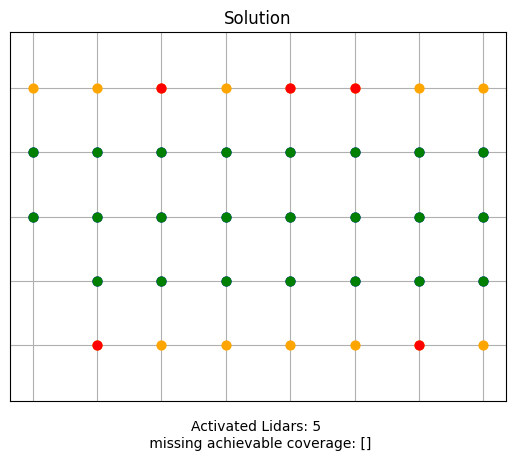

In [7]:
answer_list = []
for data_i in pat_datas:
            
    cplex_model = SPCplex(data_i)
    answer = cplex_model.solve(TimeLimit=1)
    answer_list.append(answer)


    print(f"answer.solution = {answer['solution']}")
    # lenght of the solution
    print(f"len(answer.solution) = {len(answer['solution'])}")
    evaluation = SPEvaluation(data_i, answer["solution"])
    print(f"solution clean: {evaluation.solution}")

    print(f"objective = {evaluation.get_objective()}")
    for constraint, violations in evaluation.check_solution().items():
        if len(violations) > 0:
            print(f"constraint {constraint} was violated {len(violations)} times")

    plt = SPPlot(data_i, evaluation).plot_solution(hide_never_covered = True)
    # show x,y axis (labels)
    plt.show()

# entire evaluation
answer_merge = {
    "solution": {}
}


for answer in answer_list:
    # print(f"answer.solution = {answer['solution']}")
    answer_merge["solution"].update(answer['solution'])
# for key in answer_merge["solution"]:
#     print(f"key = {key}")



objective = 9


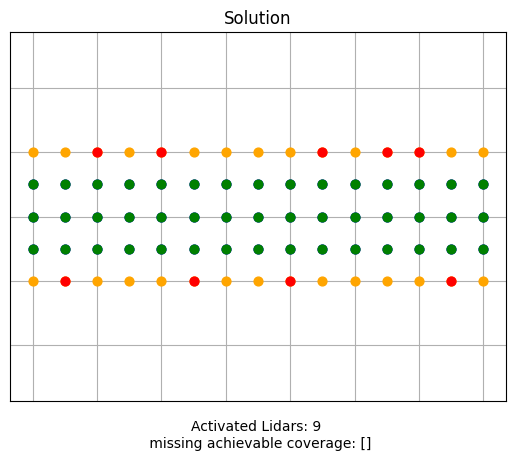

In [9]:
evaluation_merge = SPEvaluation(data, answer_merge["solution"])
print(f"objective = {evaluation_merge.get_objective()}")
for constraint, violations in evaluation_merge.check_solution().items():
    if len(violations) > 0:
        print(f"constraint {constraint} was violated {len(violations)} times")

plt = SPPlot(data, evaluation_merge).plot_solution(hide_never_covered = True)
# show x,y axis (labels)
plt.show()